## Singular Value Decomposition and Image Compression

In this problem, we introduce the concept of a singular value decomposition (SVD) of a matrix, one of the most commonly used techniques in data analysis. The SVD has many interesting applications. Here we will see one application to data compression: we will use the SVD to compress an image.

## The singular value decomposition (SVD)

Let $A \in \mathbb{R}^{m \times n}$ be a matrix of rank $r$, where the rank of $A$ is the number of linearly independent columns of $A$. The SVD of $A$ is a decomposition of the form
  $$ A = U \Sigma V^T $$
where $U \in \mathbb{R}^{m \times m}$ is an orthogonal matrix ($U^T U = I$), $V \in \mathbb{R}^{n \times n}$ is an orthogonal matrix, and $\Sigma \in \mathbb{R}^{m \times n}$ is a diagonal matrix with $r$ positive scalars $\sigma_1, \dots, \sigma_r$ on the diagonal (in the $r \times r$ block on the upper left) and zeros everywhere else. The scalars $\sigma_1, \dots, \sigma_r$ are called the singular values and are given by
  $$\sigma_i = \sqrt{\text{$i$-th eigenvalue of $A^\top A$}},$$
and by convention they appear in non-increasing order:
  $$\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r.$$
The columns of $U$ and $V$ respectively are called the left and right singular vectors of $A$, and can be obtained by taking an orthonormal set of eigenvectors for the matrices $A A^T$ and $A^T A$.

## The SVD and data compression

We can approximate a given matrix $A$ of rank $r$ by a matrix of smaller rank $k \leq r$ by truncating its SVD $A = U \Sigma V^T$ as follows. Consider an SVD $A = U \Sigma V^T$. Let
  $$ A_k = U_k \Sigma_k V^T_k $$
where $U_k$ has the first $k$ columns of $U$, $V_k$ has the first $k$ columns of $V$, and $\Sigma_k$ is the upper left $k \times k$ block of $\Sigma$. A well-known result states that $A_k$ is the optimal solution to
  $$ \min_{B \in \mathbb{R}^{m \times n} \colon \mathrm{rank}(B) \leq k} \|A - B\|_F, $$
where $\|C\|_F = \sqrt{\sum_{i, j} C^2_{ij}}$ is the Frobenius norm of a matrix. 

Note that the approximation $A_k$ can be represented using $(n + m + 1)k$ numbers. In contrast, we need $mn$ numbers to represent $A$.

Your task is to show some basic facts about the SVD and to apply it to image compression.

## Question 1

Show that the eigenvalues of $A^T A$ are non-negative (and thus the singular values are non-negative reals).

<b>Proof:</b>
Select any $x \in \mathbb{R}^n$. Then $x^T(A^T A)x = (x^TA^T)(Ax) = \| Ax\| \geq 0$. Thus $A^T A$ is PSD and as a result i has non-negative eigenvalues.

## Question 2

Show that if $u_i$ and $u_j$ are eigenvectors of $A^T A$ corresponding to distinct eigenvalues $\lambda_i \neq \lambda_j$ then $u_i$ and $u_j$ are orthogonal.

<b>Proof:</b>
Suppose $v_1, v_2$ the eigenvectors with corresponding eigenvalues $\lambda_1, \lambda_2$. Then:

$(A^TA)v_1 = \lambda_1 v_1 \Rightarrow v_2^T(A^TA)v_1 = v_2^T \lambda_1 v_1 \Rightarrow (Av_2)^T(Av_1) = \lambda_1 v_2^T v_1 = \Rightarrow \lambda_2 v_2^T \lambda_1 v_1 = \lambda_1 v_2^T v_1 \Rightarrow \lambda_2 \lambda_1 = \lambda_1$, as long as $v_2^T v_1 \neq 0$

With the same process beginning from $v_2$ we can get that $\lambda_2 \lambda_1 = \lambda_2$ which implies that $\lambda_1 = \lambda_2$ which is a contradiction. Thus it must be that $v_2^T v_1 = 0$

## Question 3

We will now use the SVD to compress an [image of Rhett the BU Terrier](https://www.dropbox.com/s/g8v91giu1ytkiqx/bulogo.jpg?dl=0).
    
Use the code provided to read the input image and turn it into a matrix $A$. Compute the SVD approximation $A_k$ of $A$ for $k = 25, 50, 75, 100$. Print the value of $\| A - A_k \|_F$ in each case.

You may need to install the [opencv](https://anaconda.org/conda-forge/opencv) and [numpy](https://numpy.org/install/) packages.

In [1]:
!pip3 install opencv-python

In [3]:
import numpy as np
from numpy import linalg
import cv2
import matplotlib.pyplot as plt

In [4]:
# load a color image in grayscale
img = cv2.imread('bulogo.jpg', 0)

# make the image into a matrix
A = np.array(img)

# compute the SVD of A
U,S,V = linalg.svd(A)
print(U)

# show the image
cv2.imshow('image',A)
cv2.waitKey(0)

# write the  image
cv2.imwrite('bulogo-gray.png',A)

[[ 0.01586961  0.01033326  0.02086391 ... -0.09924579 -0.09984004
  -0.13662513]
 [ 0.01586961  0.01033326  0.02086391 ... -0.00254728 -0.00245401
  -0.00319838]
 [ 0.01586961  0.01033326  0.02086391 ... -0.00582331 -0.00772608
  -0.0019779 ]
 ...
 [ 0.01586961  0.01033326  0.02086391 ... -0.00036597  0.00435166
   0.00557992]
 [ 0.01586961  0.01033326  0.02086391 ... -0.00036597  0.00435166
   0.00557992]
 [ 0.01586961  0.01033326  0.02086391 ... -0.00036597  0.00435166
   0.00557992]]


True

In [5]:
def show_save(A,k):
    cv2.imshow('image',A)
    cv2.waitKey(0)

    # write the  image
    cv2.imwrite('bulogo-grayk=' + str(k) + '.png',A)

In [6]:
SVD = np.linalg.svd(A)

for k in [25,50,75,100]:
    
    U_k = np.hstack((SVD[0][:, :k], np.zeros((SVD[0].shape[0], SVD[0].shape[1] - k))))
    
    V_k = np.vstack((SVD[2][:k, :], np.zeros((SVD[2].shape[0] - k, SVD[2].shape[1]))))
    
    Σ_k = np.zeros((U_k.shape[1],V_k.shape[0]))
    Σ_k[:k, :k] = np.diag(SVD[1])[:k, :k]
    
    # show_save(U_k @ Σ_k @ V_k,k)
    print("for k = ", k ,"the frobenius norm is", round(np.linalg.norm(A - U_k @ Σ_k @ V_k),3))

for k =  25 the frobenius norm is 18440.468
for k =  50 the frobenius norm is 11761.946
for k =  75 the frobenius norm is 8299.695
for k =  100 the frobenius norm is 6284.24


## Question 4

Use matplotlib to generate the following plots:

* Show on the same figure the original image and the approximations $A_k$ for $k = 25, 50, 75, 100$.
* Plot $\|A - A_k\|_F$ vs $k$ for $k = 25, 50, 75, 100$.
* Recall that the compression that we achieve when we replace $A$ by $A_k$ is $mn - (n + m + 1)k$. Plot the compression vs $k$ for $k = 25, 50, 75, 100$.


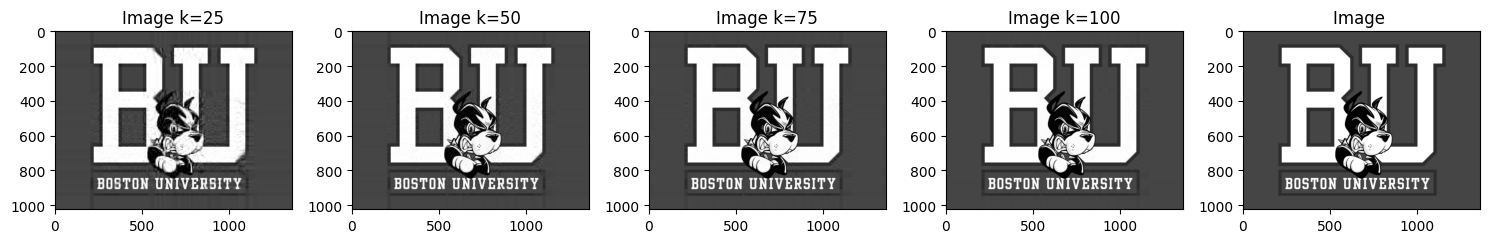

In [8]:
plt.figure(figsize=(15, 25)) 

base_file = "bulogo-gray" 

for i, extension in enumerate(["k=25","k=50","k=75","k=100", ""]):
    # Load the image
    image = cv2.imread(base_file + extension + ".png")
    
    # Create a subplot for each image
    plt.subplot(1, 5, i + 1)  # 1 row, 5 columns, subplot i
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB if needed
    plt.title(f'Image {extension}')  # Set a title for the image

# Show the figure with all images
plt.tight_layout()  # Ensure proper layout
plt.show()

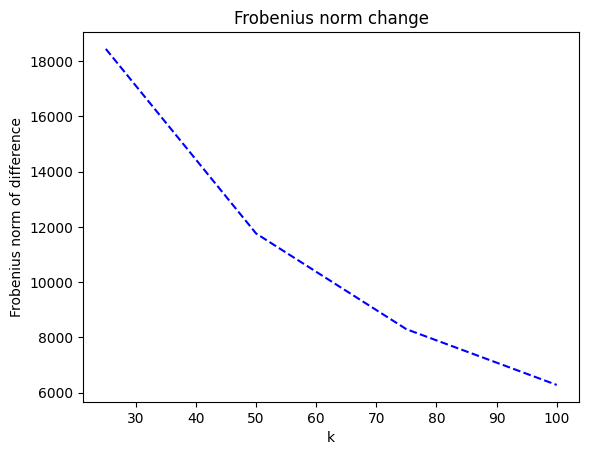

In [11]:
y = [18440.468, 11761.946, 8299.695, 6284.24]
x = [25,50,75,100]

plt.plot(x, y, linestyle='--', color='b')
plt.xlabel('k')
plt.ylabel('Frobenius norm of difference')
plt.title("Frobenius norm change")
plt.show()

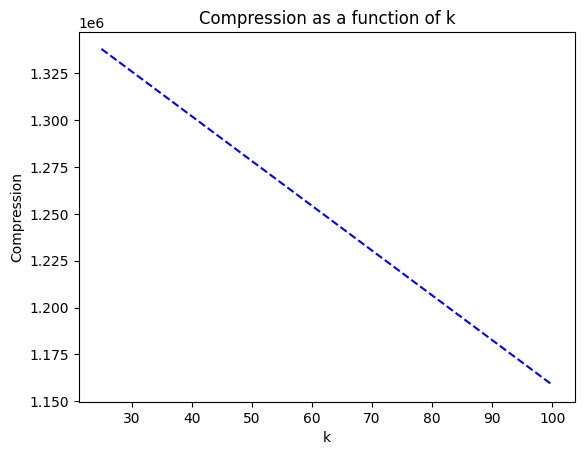

In [12]:
x = [25,50,75,100]
y = [A.shape[0]*A.shape[1] -(A.shape[0] + A.shape[1] + 1) * k for k in x]

plt.plot(x, y, linestyle='--', color='b')
plt.xlabel('k')
plt.ylabel('Compression')
plt.title("Compression as a function of k")
plt.show()